<a href="https://colab.research.google.com/github/samarjahanahmedburney/Student_Dropout/blob/main/student_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **libraries**

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# **uplording data**

In [360]:
df = pd.read_csv("/content/sample_data/Student-Data.csv")

# **data cleaning**

In [361]:
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [362]:
df.shape

(480, 17)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [364]:
df.isnull()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
477,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
478,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [365]:
df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [366]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [367]:
df.select_dtypes(include="object").columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [368]:
data_corr =df.select_dtypes("int64").corr()
data_corr

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [369]:
data_cov =df.select_dtypes("int64").cov()
data_cov

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,947.360543,704.142328,527.415919,288.704802
VisITedResources,704.142328,1094.286843,523.338453,222.431072
AnnouncementsView,527.415919,523.338453,708.158312,306.906159
Discussion,288.704802,222.431072,306.906159,763.844398


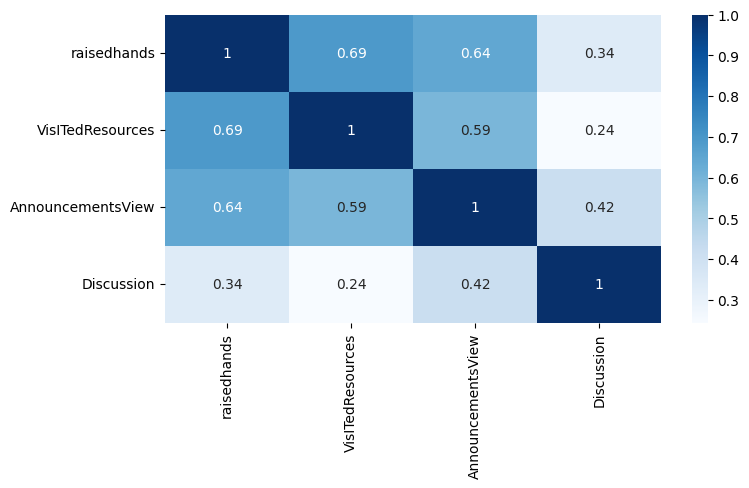

In [370]:
plt.figure(figsize=(8,4))
sns.heatmap(data_corr, annot=True, cmap="Blues")
plt.show()

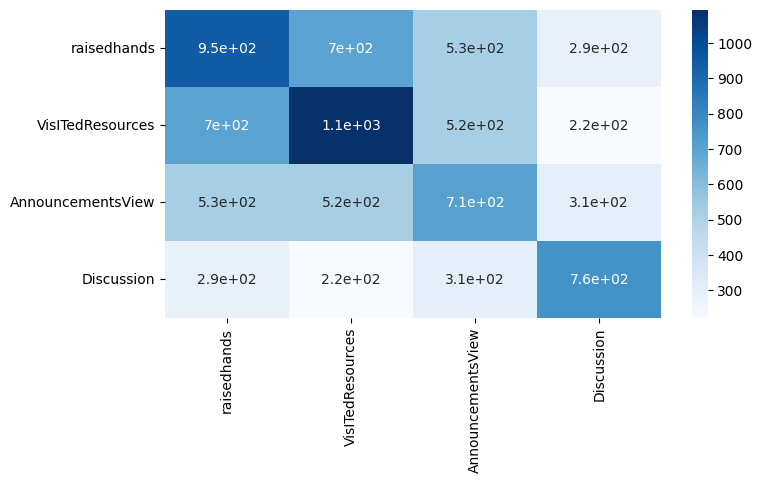

In [371]:
plt.figure(figsize=(8,4))
sns.heatmap(data_cov, annot=True, cmap="Blues")
plt.show()

In [372]:
df["dropout"] = df["Class"].apply(lambda x: 1 if x == "L" else 0)
df.drop(columns=["Class"], inplace=True)

# **feature processing**

In [373]:
features = [
    "gender",
    "NationalITy",
    "StageID",
    "GradeID",
    "SectionID",
    "raisedhands",
    "VisITedResources",
    "AnnouncementsView",
    "Discussion",
    "StudentAbsenceDays",
    "ParentAnsweringSurvey",
    "ParentschoolSatisfaction"
]

gender
M    305
F    175
Name: count, dtype: int64


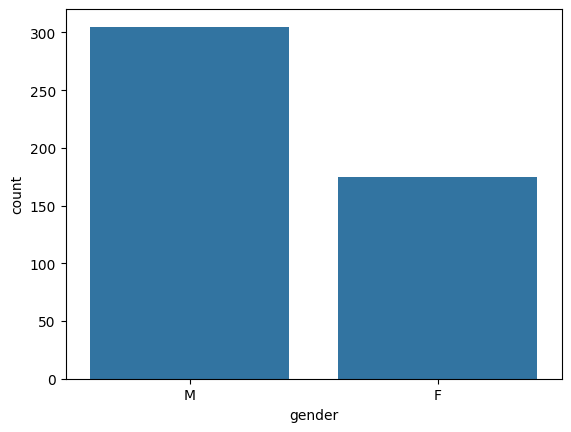

NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64


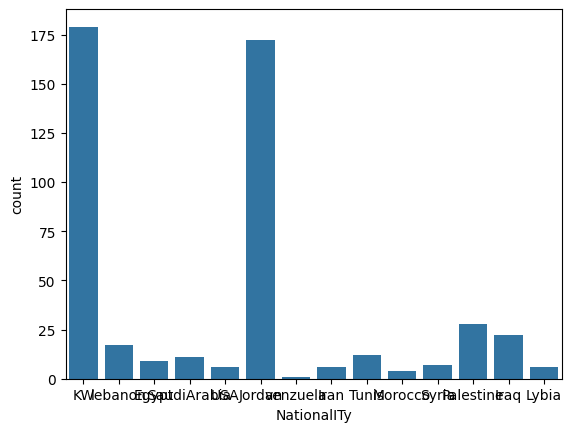

StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64


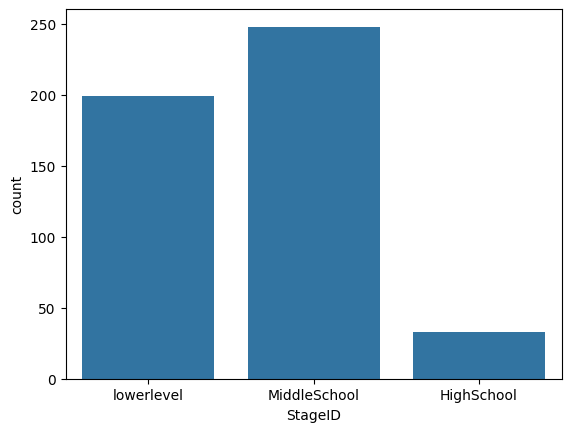

GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64


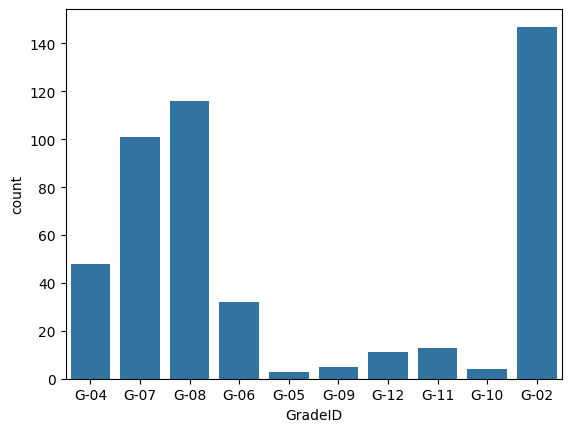

SectionID
A    283
B    167
C     30
Name: count, dtype: int64


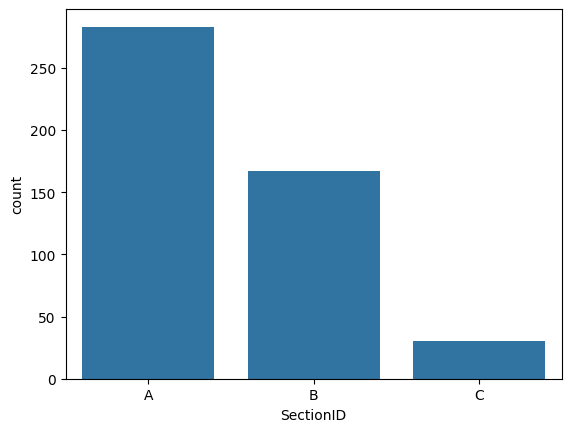

StudentAbsenceDays
Under-7    289
Above-7    191
Name: count, dtype: int64


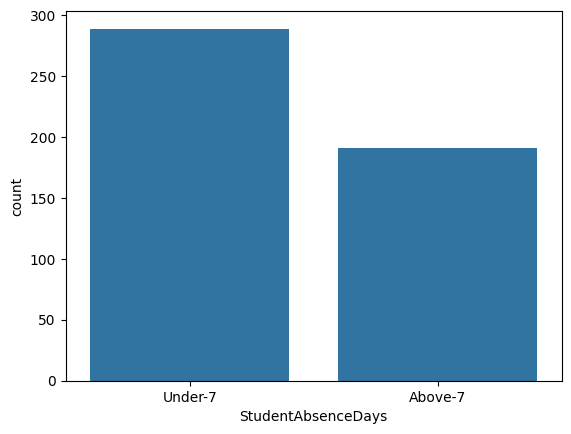

ParentAnsweringSurvey
Yes    270
No     210
Name: count, dtype: int64


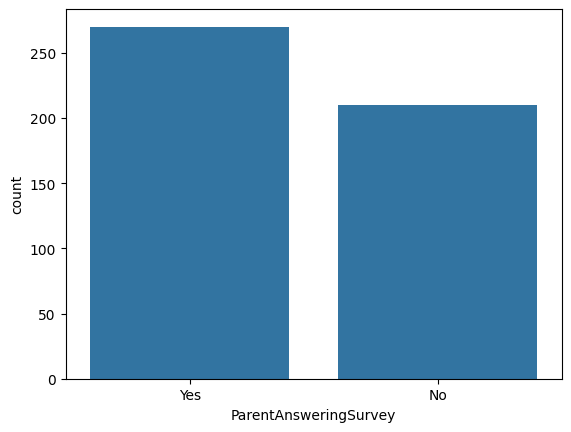

ParentschoolSatisfaction
Good    292
Bad     188
Name: count, dtype: int64


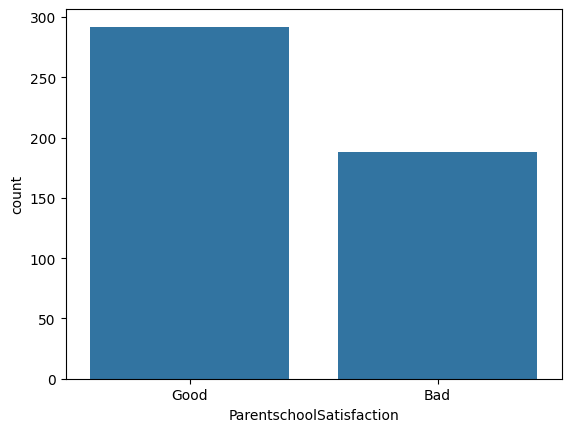

gender
M    305
F    175
Name: count, dtype: int64


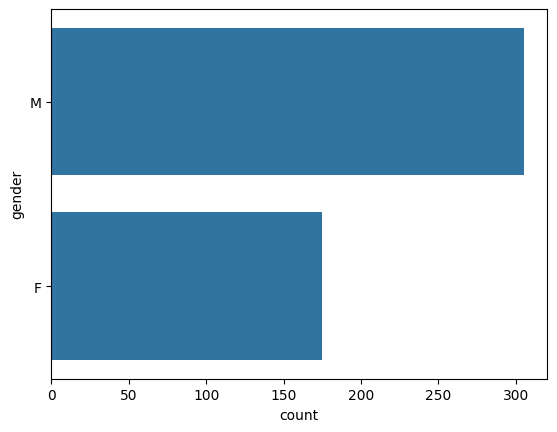

NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64


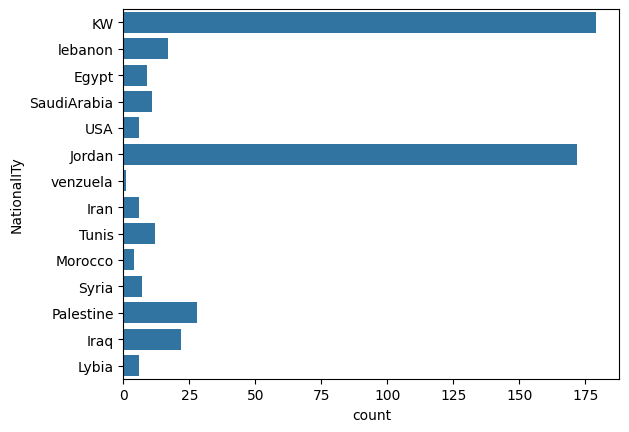

StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64


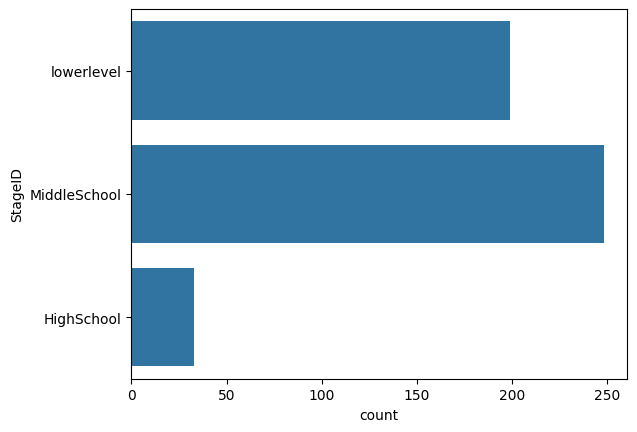

GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64


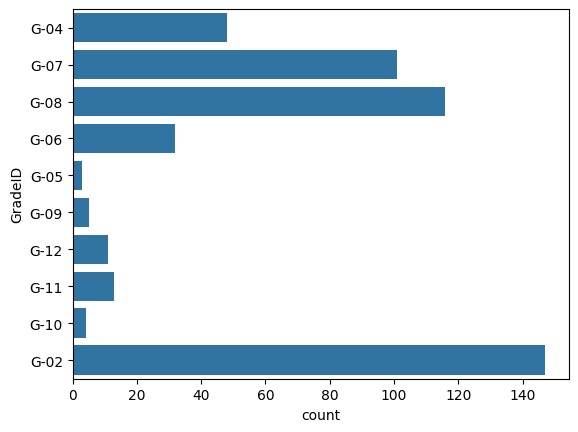

SectionID
A    283
B    167
C     30
Name: count, dtype: int64


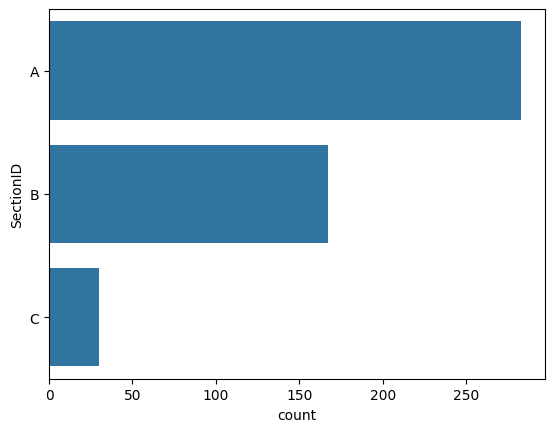

StudentAbsenceDays
Under-7    289
Above-7    191
Name: count, dtype: int64


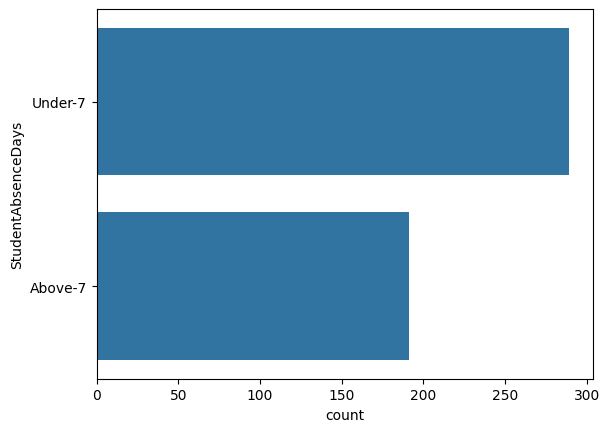

ParentAnsweringSurvey
Yes    270
No     210
Name: count, dtype: int64


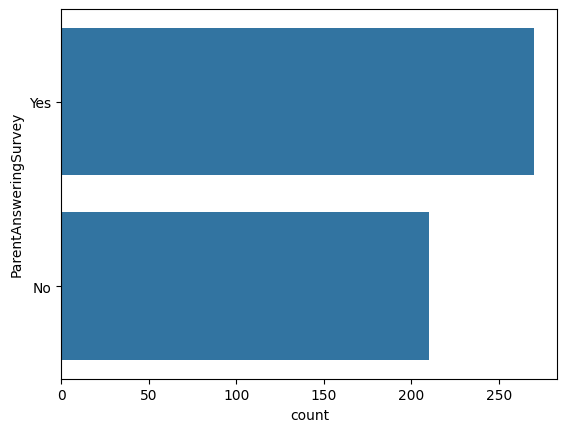

ParentschoolSatisfaction
Good    292
Bad     188
Name: count, dtype: int64


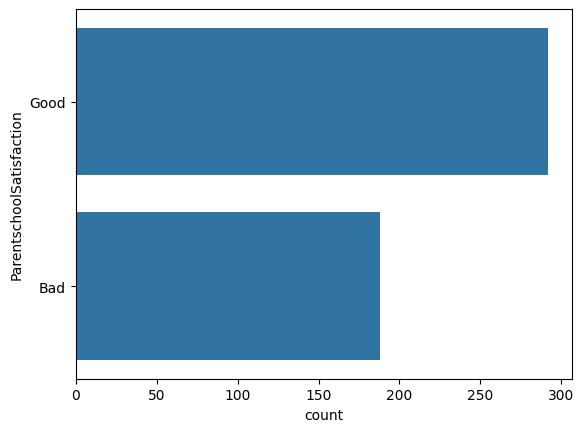

In [374]:
# Categorical / Numeric
# =========================
cat_features = [
    "gender",
    "NationalITy",
    "StageID",
    "GradeID",
    "SectionID",
    "StudentAbsenceDays",
    "ParentAnsweringSurvey",
    "ParentschoolSatisfaction"
]

for col in cat_features:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.show()
for col in cat_features:
    print(df[col].value_counts())
    sns.countplot(y=col, data=df)
    plt.show()

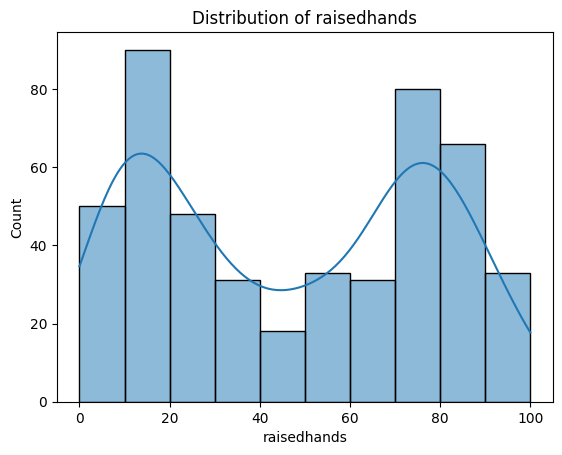

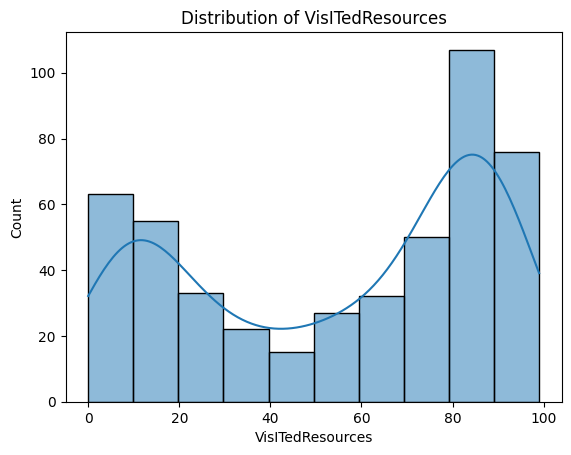

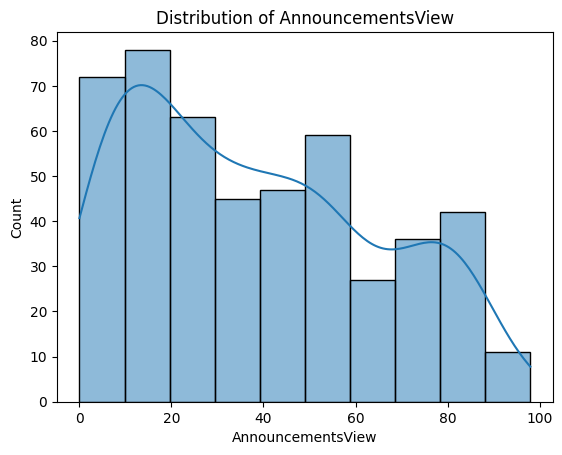

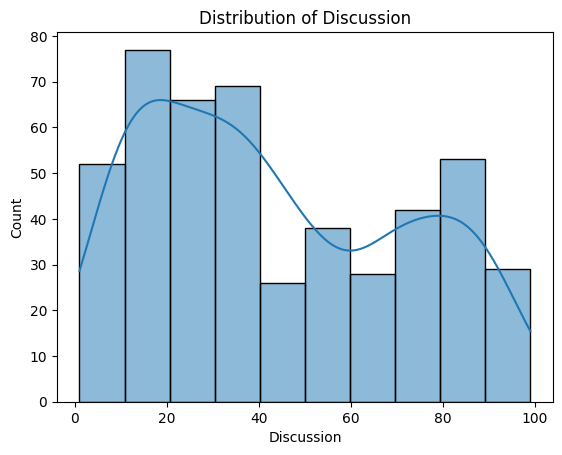

In [375]:
num_features = [
    "raisedhands",
    "VisITedResources",
    "AnnouncementsView",
    "Discussion"
]
for col in num_features:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# **target column**

In [376]:
X = df[features]
y = df["dropout"]

# **Train-test split**

In [377]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Preprocessing + model pipeline

In [378]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)

In [379]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []

In [380]:
from sklearn.metrics import accuracy_score

for name, model in models.items():
    if name == "Naive Bayes":
        # For GaussianNB, ensure dense input
        dense_preprocessor = ColumnTransformer(
            transformers=[
                ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
                ("num", "passthrough", num_features)
            ]
        )
        pipe = Pipeline(steps=[
            ("preprocessor", dense_preprocessor),
            ("model", model)
        ])
    else:
        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Dropout Recall": round(recall, 3)
    })


# ** Train model**

In [381]:


    print("\n==============================")
    print(f"Model: {name}")
    print("==============================")
    print(classification_report(y_test, y_pred))


Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.91      0.80      0.85        25

    accuracy                           0.93        96
   macro avg       0.92      0.89      0.90        96
weighted avg       0.93      0.93      0.93        96



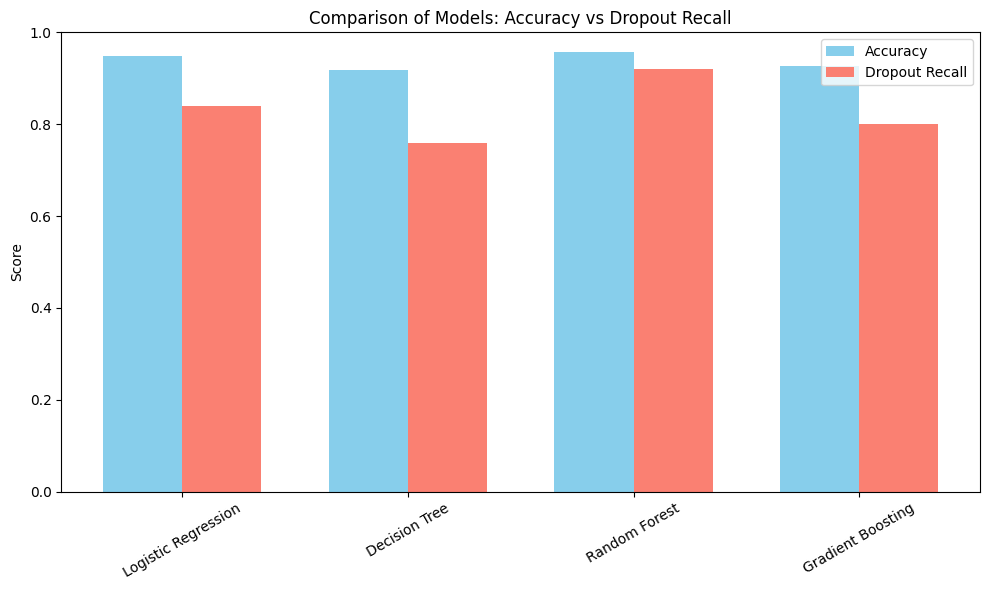

In [382]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(results_df))

plt.bar(x, results_df["Accuracy"], width=bar_width, label="Accuracy", color="skyblue")
plt.bar([i + bar_width for i in x], results_df["Dropout Recall"], width=bar_width, label="Dropout Recall", color="salmon")

plt.xticks([i + bar_width/2 for i in x], results_df["Model"], rotation=30)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Comparison of Models: Accuracy vs Dropout Recall")
plt.legend()
plt.tight_layout()
plt.show()

In [383]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Example: Preprocessing + Model Pipeline
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), ["gender","StageID"]),
                  ("num","passthrough", ["raisedhands","VisITedResources"])]
)

model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("classifier", LogisticRegression())])

# Train the model
model.fit(X_train, y_train)

# Save it to disk
joblib.dump(model, "dropout_model.pkl")

['dropout_model.pkl']

In [384]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for 200 students
num_students = 200

# Features: attendance rate (%), early grades, participation score (1-10)
attendance = np.random.uniform(50, 100, num_students)  # attendance between 50% and 100%
grades = np.random.uniform(50, 100, num_students)      # grades between 50 and 100
participation = np.random.randint(1, 11, num_students) # participation score between 1 and 10

# Generate labels: 0 = Continue, 1 = Dropout
# Let's assume students with low attendance, grades, and participation are at higher risk
dropout_prob = (
    (attendance < 70).astype(int) +
    (grades < 60).astype(int) +
    (participation < 4).astype(int)
)

# If sum > 1, mark as dropout
labels = (dropout_prob > 1).astype(int)

# Create DataFrame
data = pd.DataFrame({
    'attendance': attendance,
    'grades': grades,
    'participation': participation,
    'dropout': labels
})

# Save to CSV for future use
data.to_csv('student_data.csv', index=False)

print("Sample data created and saved to 'student_data.csv'.")

Sample data created and saved to 'student_data.csv'.


In [385]:
import joblib

pipeline = joblib.load('dropout_model.pkl')

# Predict risk scores (probabilities)
risk_scores = pipeline.predict_proba(X)[:, 1]  # probability of dropout

# Assign risk labels
risk_label = pd.cut(risk_scores, bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Create output CSV
output = pd.DataFrame({
    'student_id': df.index,
    'risk_score': risk_scores,
    'risk_label': risk_label,
    'predicted_dropout': pipeline.predict(X)
})

output.to_csv('student_risk_predictions.csv', index=False)
